In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
from commons import *

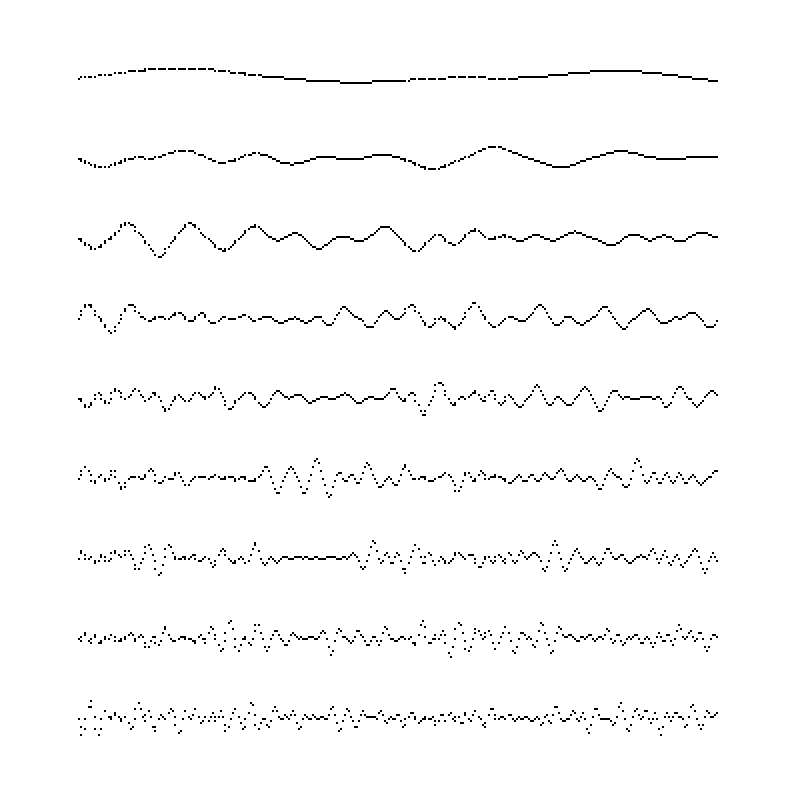

In [112]:
# !pip install perlin-noise

import math

from random import random
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise


upscaling = 2
img_width = 400
img_height = 400

image = Image.new("RGB", (img_width*upscaling, img_height*upscaling), "white")
d = Drawing(image, scaling=upscaling)

class SquigglyBrush(Brush):
    def __init__(self, octaves = math.pi*10) -> None:
        super().__init__()
        self.noise = PerlinNoise(octaves=octaves, seed=random()*100)
        self.color = (0,0,0)

    def stroke(self, start, end, drawing: Drawing):
        start = drawing._transform(start)
        end = drawing._transform(end)
        # First we calculate the number of steps 
        # (adding 2 here to compress the stroke and avoid the errors due to math)
        steps = max(abs(start[0] - end[0]), abs(start[1] - end[1])) + 1

        for step, pos in enumerate(lineplot(start, end, steps)):
            p, dp = pos
            # dp is a tangent to the stroke and pdp is normal to the stroke
            pdp = rotate(dp, 90) 

            n = self.noise(step/steps)
            drawing.point(p + pdp * n * 20, self.color) #Some compression here



for i in range(9):
    octaves = math.pi if i==0 else i*10
    d.line((0.1, 0.1 + (i*0.1)), (0.9, 0.1 + (i*0.1)), SquigglyBrush(octaves))
image

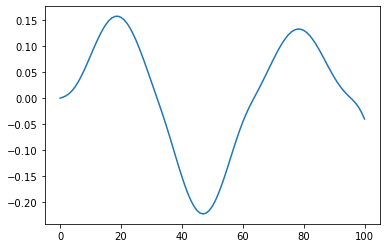

In [86]:
num = 100
plt.plot([i for i in range(num+1)], [noise(i/num) for i in range(num+1)])